<a href="https://colab.research.google.com/github/ekpurwanto/E-Commerce-Public-Dataset/blob/main/ID_0LZ0Q2R8QZ65_Eko_Purwanto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: E-Commerce Public Dataset
- Nama: Eko Purwanto
- Email: ekpurwanto.radio@gmail.com
- Id Dicoding: 0LZ0Q2R8QZ65

## Menentukan Pertanyaan Bisnis

1. Customer Geography Analysis: Bagaimana distribusi geografis pelanggan (customer_city, customer_state) mempengaruhi pola pembelian dan kepuasan pelanggan?

2. Order Processing Time: Berapa lama waktu yang diperlukan untuk memproses pesanan (mulai dari order_purchase_timestamp hingga order_delivered_carrier_date dan order_customer_date)? Apakah ada keterlambatan yang signifikan dalam pengiriman?

3. Product Category Insights: Produk kategori mana yang paling sering menerima ulasan negatif (review_score) atau memiliki keluhan pelanggan (review_comment_message)? Apakah ada pola umum yang dapat diidentifikasi?

4. Payment Analysis: Apa jenis pembayaran yang paling umum digunakan oleh pelanggan (payment_type)? Apakah ada hubungan antara jumlah angsuran (payment_installments) dan total pembayaran (payment_value)?

5. Seller Performance: Bagaimana kinerja penjual (sellers_df) berdasarkan lokasi (seller_city, seller_state) dan bagaimana hal ini memengaruhi pengiriman dan kepuasan pelanggan?

## Menyaipkan semua library yang dibuthkan

In [66]:
import numpy as np  # aljabar linear
import os
import pandas as pd  # pengolahan data
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
import plotly.express as px # data visualization
from plotly.subplots import make_subplots # data visualization


##Gathering Data

mengumpulkan semua data yang diperlukan dari dataset E-Comerce Public

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
customers_df = pd.read_csv('/content/drive/MyDrive/Dicoding/E-Commerce Public Dataset/customers_dataset.csv')
orders_df = pd.read_csv('/content/drive/MyDrive/Dicoding/E-Commerce Public Dataset/orders_dataset.csv')
order_reviews_df = pd.read_csv('/content/drive/MyDrive/Dicoding/E-Commerce Public Dataset/order_reviews_dataset.csv')
order_payments_df = pd.read_csv('/content/drive/MyDrive/Dicoding/E-Commerce Public Dataset/order_payments_dataset.csv')
order_items_df = pd.read_csv('/content/drive/MyDrive/Dicoding/E-Commerce Public Dataset/order_items_dataset.csv')
products_df = pd.read_csv('/content/drive/MyDrive/Dicoding/E-Commerce Public Dataset/products_dataset.csv')
sellers_df = pd.read_csv('/content/drive/MyDrive/Dicoding/E-Commerce Public Dataset/sellers_dataset.csv')
product_category_translation_df = pd.read_csv('/content/drive/MyDrive/Dicoding/E-Commerce Public Dataset/product_category_name_translation.csv')

## Assesing Data



Mengevaluasi dataset mencakup mengidentifikasi masalah seperti data yang hilang, data yang tidak valid, atau duplikat.

Customers Dataframe

In [69]:
# Menampilkan beberapa baris pertama dari setiap DataFrame
print("Customers DataFrame:")
customers_df.head()

Customers DataFrame:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [70]:
#check column and value dataset info
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [71]:
customers_df.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [72]:
#check data size
customers_df.shape

(99441, 5)

In [73]:
# Identifying missing values
customers_df.isna().sum().to_frame().reset_index().rename(columns={'index':'column_name', 0:'value'})

,column_name,value
0,customer_id,0
1,customer_unique_id,0
2,customer_zip_code_prefix,0
3,customer_city,0
4,customer_state,0


In [74]:
# Identifying duplicates values
customers_df[customers_df.duplicated(keep=False)]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


In [75]:
# Identifying inconsistencies in the customer_state column
customers_df.customer_state.value_counts()

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64

Order Dataframe

In [76]:
print("\nOrders DataFrame:")
orders_df.head()


Orders DataFrame:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [77]:
#check column and value dataset info
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [78]:
orders_df.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [79]:
#check data size
orders_df.shape

(99441, 8)

In [80]:
# Identifying missing values
orders_df.isna().sum().to_frame().reset_index().rename(columns={'index':'column_name', 0:'value'})

,column_name,value
0,order_id,0
1,customer_id,0
2,order_status,0
3,order_purchase_timestamp,0
4,order_approved_at,160
5,order_delivered_carrier_date,1783
6,order_delivered_customer_date,2965
7,order_estimated_delivery_date,0


In [81]:
# Identifying duplicates values
orders_df[customers_df.duplicated(keep=False)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [82]:
print("\nOrder Reviews DataFrame:")
order_reviews_df.head()


Order Reviews DataFrame:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [83]:
#check column and value dataset info
order_reviews_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [84]:
order_reviews_df.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [85]:
#check data size
order_reviews_df.shape

(99224, 7)

In [86]:
# Identifying missing values
order_reviews_df.isna().sum().to_frame().reset_index().rename(columns={'index':'column_name', 0:'value'})

,column_name,value
0,review_id,0
1,order_id,0
2,review_score,0
3,review_comment_title,87656
4,review_comment_message,58247
5,review_creation_date,0
6,review_answer_timestamp,0


In [87]:
# Identifying duplicates values
order_reviews_df[order_reviews_df.duplicated(keep='first')]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp


In [88]:
print("\nOrder Payments DataFrame:")
order_payments_df.head()


Order Payments DataFrame:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [89]:
#check column and value dataset info
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [90]:
order_payments_df.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

In [91]:
#check data size
order_payments_df.shape

(103886, 5)

In [92]:
# Identifying missing values
order_payments_df.isna().sum().to_frame().reset_index().rename(columns={'index':'column_name', 0:'value'})

,column_name,value
0,order_id,0
1,payment_sequential,0
2,payment_type,0
3,payment_installments,0
4,payment_value,0


In [93]:
# Identifying duplicates values
order_payments_df[order_payments_df.duplicated(keep='first')]

,order_id,payment_sequential,payment_type,payment_installments,payment_value


In [94]:
print("\nOrder Items DataFrame:")
order_items_df.head()


Order Items DataFrame:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [95]:
#check column and value dataset info
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [96]:
order_items_df.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [97]:
#check data size
order_items_df.shape

(112650, 7)

In [98]:
# Identifying missing values
order_items_df.isna().sum().to_frame().reset_index().rename(columns={'index':'column_name', 0:'value'})

,column_name,value
0,order_id,0
1,order_item_id,0
2,product_id,0
3,seller_id,0
4,shipping_limit_date,0
5,price,0
6,freight_value,0


In [99]:
# Identifying duplicates values
order_items_df[order_items_df.duplicated(keep='first')]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


In [100]:
print("\nProducts DataFrame:")
products_df.head()


Products DataFrame:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [101]:
#check column and value dataset info
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [102]:
products_df.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [103]:
#check data size
products_df.shape

(32951, 9)

In [104]:
# Identifying missing values
products_df.isna().sum().to_frame().reset_index().rename(columns={'index':'column_name', 0:'value'})

,column_name,value
0,product_id,0
1,product_category_name,610
2,product_name_lenght,610
3,product_description_lenght,610
4,product_photos_qty,610
5,product_weight_g,2
6,product_length_cm,2
7,product_height_cm,2
8,product_width_cm,2


In [105]:
# Identifying duplicates values
products_df[products_df.duplicated(keep='first')]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


In [106]:
print("\nSellers DataFrame:")
sellers_df.head()


Sellers DataFrame:


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [107]:
#check column and value dataset info
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [108]:
sellers_df.dtypes

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

In [109]:
#check data size
sellers_df.shape

(3095, 4)

In [110]:
# Identifying missing values
sellers_df.isna().sum().to_frame().reset_index().rename(columns={'index':'column_name', 0:'value'})

,column_name,value
0,seller_id,0
1,seller_zip_code_prefix,0
2,seller_city,0
3,seller_state,0


In [111]:
# Identifying duplicates values
sellers_df[sellers_df.duplicated(keep='first')]

,seller_id,seller_zip_code_prefix,seller_city,seller_state


In [112]:
print("\nProduct Category Translation DataFrame:")
product_category_translation_df.head()


Product Category Translation DataFrame:


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [113]:
#check column and value dataset info
product_category_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [114]:
product_category_translation_df.dtypes

product_category_name            object
product_category_name_english    object
dtype: object

In [115]:
#check data size
product_category_translation_df.shape

(71, 2)

In [116]:
# Identifying missing values
product_category_translation_df.isna().sum().to_frame().reset_index().rename(columns={'index':'column_name', 0:'value'})

,column_name,value
0,product_category_name,0
1,product_category_name_english,0


In [117]:
# Identifying duplicates values
product_category_translation_df[product_category_translation_df.duplicated(keep='first')]

,product_category_name,product_category_name_english


In [118]:
# Fungsi untuk menilai persentase missing values di setiap DataFrame
def assess_missing_percentage(df, df_name):
    missing_percentage = df.isna().mean() * 100
    print("Persentase data yang hilang dalam DataFrame {}:\n".format(df_name))
    for column, percentage in missing_percentage.iteritems():
        print('{}: {:.2f}%'.format(column, percentage))

# Melakukan penilaian data untuk setiap DataFrame
assess_missing_percentage(customers_df, "customers_df")
assess_missing_percentage(orders_df, "orders_df")
assess_missing_percentage(order_reviews_df, "order_reviews_df")
assess_missing_percentage(order_payments_df, "order_payments_df")
assess_missing_percentage(order_items_df, "order_items_df")
assess_missing_percentage(products_df, "products_df")
assess_missing_percentage(sellers_df, "sellers_df")
assess_missing_percentage(product_category_translation_df, "product_category_translation_df")

Persentase data yang hilang dalam DataFrame customers_df:

customer_id: 0.00%
customer_unique_id: 0.00%
customer_zip_code_prefix: 0.00%
customer_city: 0.00%
customer_state: 0.00%
Persentase data yang hilang dalam DataFrame orders_df:

order_id: 0.00%
customer_id: 0.00%
order_status: 0.00%
order_purchase_timestamp: 0.00%
order_approved_at: 0.16%
order_delivered_carrier_date: 1.79%
order_delivered_customer_date: 2.98%
order_estimated_delivery_date: 0.00%


<ipython-input-118-948e8974099b>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, percentage in missing_percentage.iteritems():
<ipython-input-118-948e8974099b>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, percentage in missing_percentage.iteritems():


Persentase data yang hilang dalam DataFrame order_reviews_df:

review_id: 0.00%
order_id: 0.00%
review_score: 0.00%
review_comment_title: 88.34%
review_comment_message: 58.70%
review_creation_date: 0.00%
review_answer_timestamp: 0.00%
Persentase data yang hilang dalam DataFrame order_payments_df:

order_id: 0.00%
payment_sequential: 0.00%
payment_type: 0.00%
payment_installments: 0.00%
payment_value: 0.00%
Persentase data yang hilang dalam DataFrame order_items_df:

order_id: 0.00%
order_item_id: 0.00%
product_id: 0.00%
seller_id: 0.00%
shipping_limit_date: 0.00%
price: 0.00%
freight_value: 0.00%
Persentase data yang hilang dalam DataFrame products_df:

product_id: 0.00%
product_category_name: 1.85%
product_name_lenght: 1.85%
product_description_lenght: 1.85%
product_photos_qty: 1.85%
product_weight_g: 0.01%
product_length_cm: 0.01%
product_height_cm: 0.01%
product_width_cm: 0.01%
Persentase data yang hilang dalam DataFrame sellers_df:

seller_id: 0.00%
seller_zip_code_prefix: 0.00%
se

<ipython-input-118-948e8974099b>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, percentage in missing_percentage.iteritems():
<ipython-input-118-948e8974099b>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, percentage in missing_percentage.iteritems():
<ipython-input-118-948e8974099b>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, percentage in missing_percentage.iteritems():
<ipython-input-118-948e8974099b>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, percentage in missing_percentage.iteritems():
<ipython-input-118-948e8974099b>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, percentage in missing_percentage.iteritems():
<ipython-input-118-9

review_comment_title: 88.34%
review_comment_message: 58.70%

Jadi kita drop karena tidak akan berpengaruh

Penggabungan data

In [119]:
merged_data = pd.merge(orders_df, order_items_df, on="order_id", how="inner")

In [120]:
merged_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [121]:
# Gabungkan orders_df dan customers_df
orders_customers = pd.merge(orders_df, customers_df, on="customer_id")

In [122]:
orders_customers

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


Menjawab Pertanyaan 3

In [137]:
# Merge orders_df and order_payments_df on order_id
merged_orders_payments = pd.merge(orders_df, order_payments_df, on='order_id')

In [141]:
# Merge merged_orders_payments and customers_df on customer_id
merged_cst = pd.merge(merged_orders_payments, customers_df, on='customer_id')


##Cleaning Data

## Exploratory Data Analysis (EDA)

### Explore ...

1. Demografis pelanggan yang paling sering melakukan pemesanan

In [132]:
# Hitung jumlah pesanan berdasarkan kota (customer_city)
city_order_counts = orders_customers['customer_city'].value_counts()

In [133]:
# Hitung jumlah pesanan berdasarkan negara bagian (customer_state)
state_order_counts = orders_customers['customer_state'].value_counts()

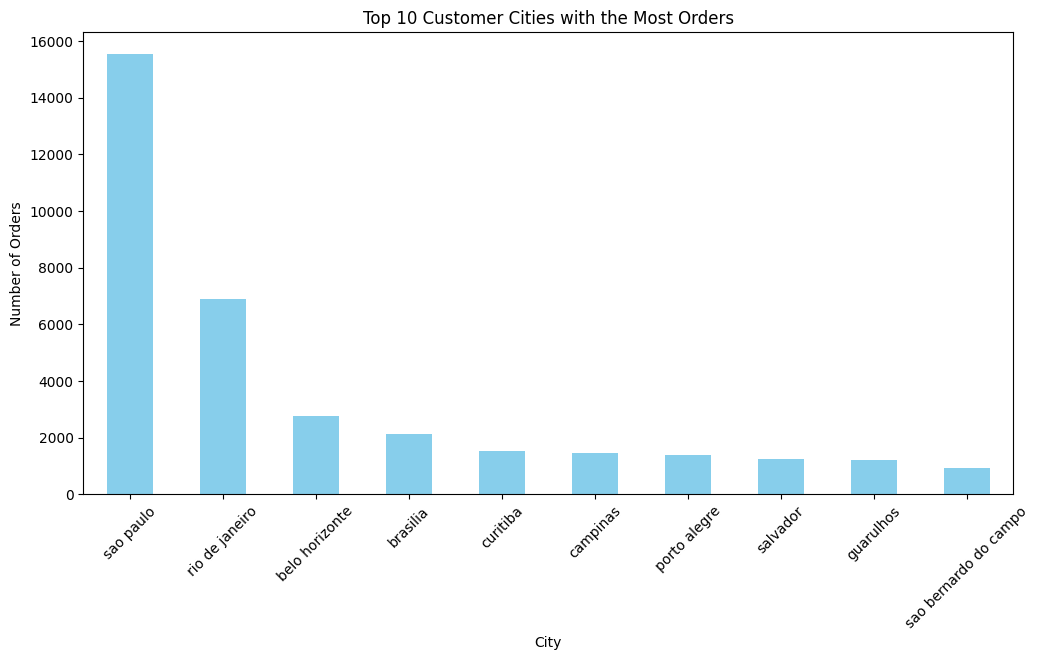

In [134]:
# Visualisasi profil demografis pelanggan berdasarkan kota
plt.figure(figsize=(12, 6))
city_order_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Customer Cities with the Most Orders')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

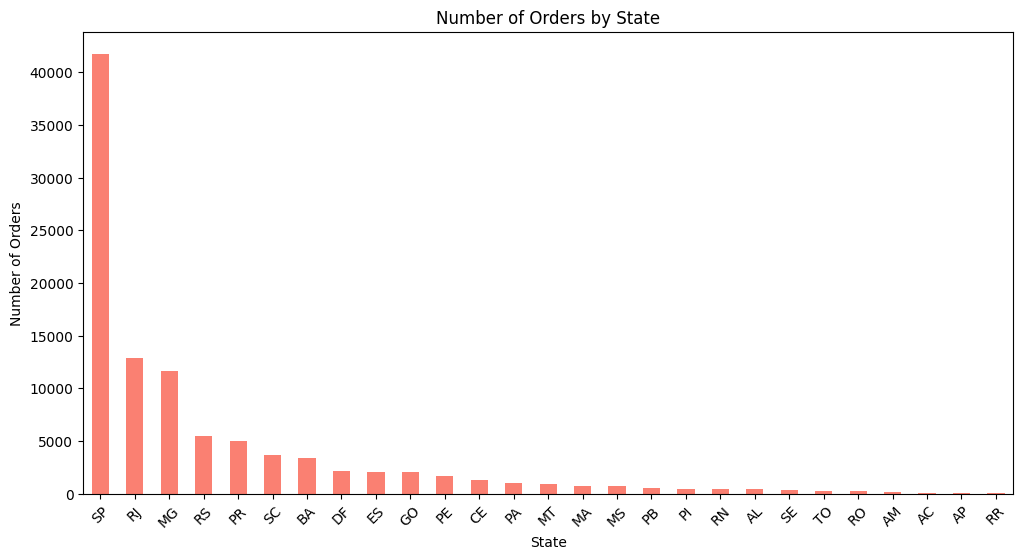

In [135]:
# Visualisasi profil demografis pelanggan berdasarkan negara bagian
plt.figure(figsize=(12, 6))
state_order_counts.plot(kind='bar', color='salmon')
plt.title('Number of Orders by State')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

3. Penghasil pendapatan TOP 5 teratas menurut negara bagian dan kota

In [143]:
# Merge orders_df and order_payments_df on order_id
merged_orders_payments = pd.merge(orders_df, order_payments_df, on='order_id')

In [144]:
# Merge merged_orders_payments and customers_df on customer_id
merged_cst = pd.merge(merged_orders_payments, customers_df, on='customer_id')


In [147]:
# Calculate revenue per city
revenue_by_city = merged_cst.groupby('customer_city')['payment_value'].sum().reset_index()


In [148]:
# Calculate revenue per state
revenue_by_state = merged_cst.groupby('customer_state')['payment_value'].sum().reset_index()

In [149]:
# Find the top 5 revenue generating cities
top_cities = revenue_by_city.nlargest(5, 'payment_value')

In [151]:
print("Top 5 revenue generating cities:")
print(top_cities)

Top 5 revenue generating cities:
       customer_city  payment_value
3597       sao paulo     2203373.09
3155  rio de janeiro     1161927.36
453   belo horizonte      421765.12
558         brasilia      354216.78
1143        curitiba      247392.48


In [150]:
# Find the top 5 revenue generating states
top_states = revenue_by_state.nlargest(5, 'payment_value')

In [152]:
print("\nTop 5 revenue generating states:")
print(top_states)


Top 5 revenue generating states:
   customer_state  payment_value
25             SP     5998226.96
18             RJ     2144379.69
10             MG     1872257.26
22             RS      890898.54
17             PR      811156.38


In [154]:
# Group data by state, city, and order date and calculate total revenue
revenue_by_state_city_date = merged_cst.groupby(['customer_state', 'customer_city', 'order_purchase_timestamp'])['payment_value'].sum().reset_index()

In [155]:
# Filter for the top 5 states and cities
top_states_cities = ['SP', 'SP', 'MG', 'RS', 'PR', 'sao paulo', 'rio de janeiro', 'belo horizonte', 'brasilia', 'curitiba']
filtered_data = revenue_by_state_city_date[revenue_by_state_city_date['customer_state'].isin(top_states_cities)]

In [156]:
 #Convert the order_purchase_timestamp to a datetime object
filtered_data['order_purchase_timestamp'] = pd.to_datetime(filtered_data['order_purchase_timestamp'])

<ipython-input-156-b2a33b430b68>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['order_purchase_timestamp'] = pd.to_datetime(filtered_data['order_purchase_timestamp'])


In [157]:
# Set the date column as the index
filtered_data.set_index('order_purchase_timestamp', inplace=True)

TypeError: ignored

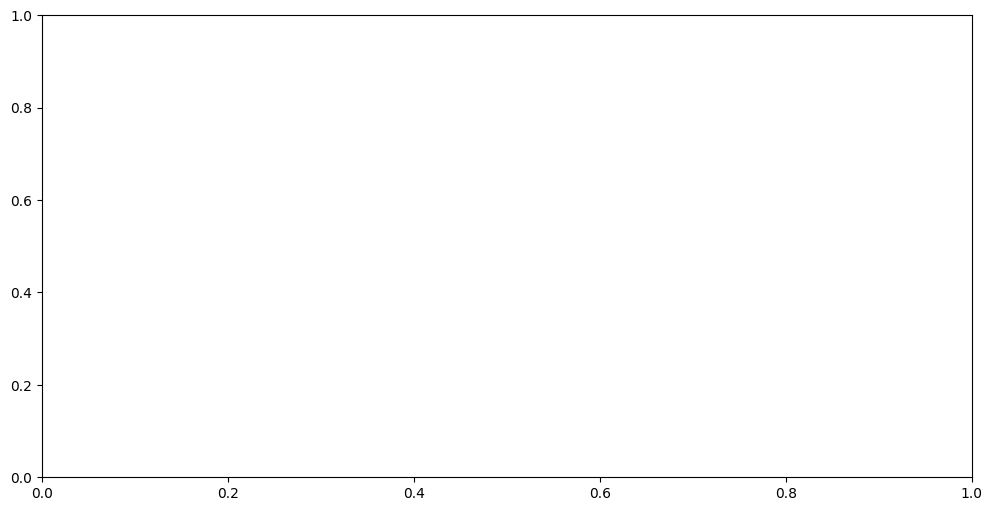

In [163]:
# Create an empty plot
plt.figure(figsize=(12, 6))

# Plot the trends for the top 5 states and cities
for (state, city), group in resampled_data.groupby(['customer_state', 'customer_city']):
    label = f'{state} - {city}'
    plt.plot(group.index, group['payment_value'], label=label)

plt.title('Revenue Trends for Top 5 States and Cities')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.legend(loc='upper left')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

### Pertanyaan 2:

## Conclusion

- Conclution pertanyaan 1
- conclution pertanyaan 2